In [ ]:
#@title Imports

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

def plot_2d_data(X, y):
    fig, ax = plt.subplots(figsize = (5, 5))
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, sizes=len(X)*[0.01])

def plot_2d_classifier(X, y, classifier):
    """Makes a scatter plot of the data points and a background of what the classifier does.
    X is a (n,2) array of data points.
        y is an (n,) array of labels.
        classifier is a function that takes a 2d points
         and gives a label."""
    border = 0.2
    x_min, x_max = X[:, 0].min() - border, X[:, 0].max() + border
    y_min, y_max = X[:, 1].min() - border, X[:, 1].max() + border
    num_points = 100
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num_points),
                        np.linspace(y_min, y_max, num_points))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    classes = np.array([classifier(p) for p in grid_points])
    classes = classes.reshape(xx.shape)
    fig = plt.figure(figsize = (6,6))
    plt.contourf(xx, yy, classes, 3, cmap=plt.cm.Spectral, alpha=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, sizes=len(X)*[0.01])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
#@title KNN class

class KNN:
    def __init__(self, X=None, y=None, k = 1, metric = 'L2'):
        self.k = k
        self.metric = metric

    def train(self, X, y):
        ## X is a (N, D) array, where N is the number of training data points
        ## and D is their dimension
        ## y is a (N,) array of class labels
        self.X = X.reshape((int(X.shape[0]), int(np.prod(X.shape[1:]))))
        self.y = y.reshape((int(y.shape[0]), int(np.prod(y.shape[1:]))))

    def predict(self, t):
        flatt = t.flatten()
        dists = np.sum((self.X-flatt)**2,axis=1)
        indlist = np.argpartition(dists, self.k)[:self.k]
        return st.mode(self.y[indlist])[0]


    def predict_batch(self, T):
        ## BONUS TASK: can you get your model to predict the values for a
        #### (M, D) array of multiple test points (all in a vectorized way)
        pass

# Efficient distance function

In [ ]:
N = 5000
D = 700
X_random = np.random.randn(N, D)

In [ ]:
def slow_L2_dist(x, y):
    """Squared Euclidean distance between vectors x and y"""
    dist = 0
    for xi, yi in zip(x,y):
        dist += (xi - yi) ** 2
    return dist

def L2_dist(x, y):
    """Squared Euclidean distance between vectors x and y"""
    return np.sum((x - y) ** 2)

def k_nearest_neighbors_slowest(X, t, k):
    dists = [slow_L2_dist(p, t) for p in X]
    return X[np.argsort(dists)][:k]

def k_nearest_neighbors_slow(X, t, k):
    dists = [L2_dist(p, t) for p in X]
    return X[np.argsort(dists)][:k]

## You should not use any Python for loops
def k_nearest_neighbors(X, t, k):
    dists = np.sum((X-t)**2,axis=tuple(range(1,len(X.shape))))
    bestindices = np.argpartition(dists, k)[:k]
    return X[bestindices[np.argsort(dists[bestindices])]]

In [ ]:
%%time
k_nearest_neighbors_slowest(X_random, X_random[0], 5)

CPU times: user 1.49 s, sys: 4.43 ms, total: 1.5 s
Wall time: 1.51 s


array([[-0.26320046, -0.49932979, -0.71594078, ..., -0.24790087,
         0.24703145, -0.3904295 ],
       [-0.75967982, -2.54515427, -0.28715191, ..., -1.10274775,
        -0.10616509, -1.47044495],
       [-2.05082086,  0.48942773, -0.05241666, ...,  0.14450043,
        -1.01973748, -0.307622  ],
       [ 1.55504757, -1.05369555, -0.78638217, ..., -0.21756489,
         0.07220008,  0.74402754],
       [-0.31687559,  1.09179405,  1.22640023, ..., -1.13101558,
        -0.44180127,  0.27472374]])

In [ ]:
%%time
k_nearest_neighbors_slow(X_random, X_random[0], 5)

CPU times: user 50 ms, sys: 11 ms, total: 61 ms
Wall time: 62.7 ms


array([[-0.26320046, -0.49932979, -0.71594078, ..., -0.24790087,
         0.24703145, -0.3904295 ],
       [-0.75967982, -2.54515427, -0.28715191, ..., -1.10274775,
        -0.10616509, -1.47044495],
       [-2.05082086,  0.48942773, -0.05241666, ...,  0.14450043,
        -1.01973748, -0.307622  ],
       [ 1.55504757, -1.05369555, -0.78638217, ..., -0.21756489,
         0.07220008,  0.74402754],
       [-0.31687559,  1.09179405,  1.22640023, ..., -1.13101558,
        -0.44180127,  0.27472374]])

In [ ]:
%%time
k_nearest_neighbors(X_random, X_random[0], 5)

CPU times: user 7.75 ms, sys: 14.1 ms, total: 21.9 ms
Wall time: 23.8 ms


array([[-0.26320046, -0.49932979, -0.71594078, ..., -0.24790087,
         0.24703145, -0.3904295 ],
       [-0.75967982, -2.54515427, -0.28715191, ..., -1.10274775,
        -0.10616509, -1.47044495],
       [-2.05082086,  0.48942773, -0.05241666, ...,  0.14450043,
        -1.01973748, -0.307622  ],
       [ 1.55504757, -1.05369555, -0.78638217, ..., -0.21756489,
         0.07220008,  0.74402754],
       [-0.31687559,  1.09179405,  1.22640023, ..., -1.13101558,
        -0.44180127,  0.27472374]])

# Visualize close points in image space

This loads the datasets of mnist and cifar, and tests it by finding the closest images to certain images from each dataset using the k-nearest-neighbors algorithm

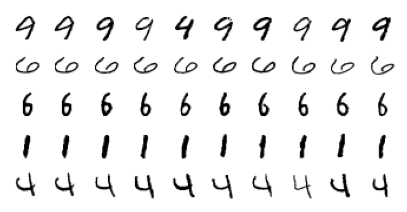

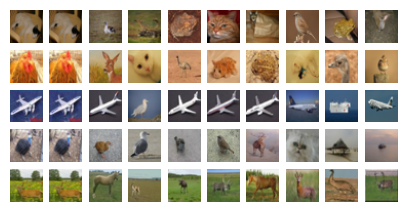

In [ ]:
## We will not access the test data until the very end
# this loads all the data the train val test will be separated
from keras.datasets import mnist, cifar10
(X_train_mnist, y_train_mnist), _ = mnist.load_data()
(X_train_cifar, y_train_cifar), _ = cifar10.load_data()

# shuffles the data together
rng_state = np.random.get_state()
np.random.shuffle(X_train_mnist)
np.random.shuffle(X_train_cifar)
np.random.set_state(rng_state)
np.random.shuffle(y_train_mnist)
np.random.shuffle(y_train_cifar)



X_train_mnist = X_train_mnist*1.0
X_train_cifar = X_train_cifar*1.0


h, w = 5, 10
fig, axes = plt.subplots(h, w, figsize = (w*0.5, h*0.5))
for i in range(h):
    axes[i][0].imshow(X_train_mnist[i].astype(int), cmap=plt.cm.binary)
    axes[i][0].axis('off')
    nearest = k_nearest_neighbors(X_train_mnist, X_train_mnist[i], w-1)
    for j in range(w-1):
        axes[i][j+1].imshow(nearest[j].astype(int), cmap=plt.cm.binary)
        axes[i][j+1].axis('off')


h, w = 5, 10
fig2, axes2 = plt.subplots(h, w, figsize = (w*0.5, h*0.5))
for i in range(h):
    axes2[i][0].imshow(X_train_cifar[i].astype(int), cmap=plt.cm.binary)
    axes2[i][0].axis('off')
    nearest = k_nearest_neighbors(X_train_cifar, X_train_cifar[i], w-1)
    for j in range(w-1):
        axes2[i][j+1].imshow(nearest[j].astype(int), cmap=plt.cm.binary)
        axes2[i][j+1].axis('off')

# Test KNN on 2d data set

We test the KNN on a toy spiral dataset.

In [ ]:
def make_cluster_data(num_points = 50, noise = 0.05,
    line_points = [((1,0), (0,1)),
    ((0, 0), (-1, 1)),
    ((-1,-0.5), (1,-0.5))]):
    """Create num_points points linearly spaced between each pair of points in line_points,
    with a gaussian noise term added, where noise is the standard deviation."""
    n = num_points * len(line_points)
    points = np.zeros((n, 2))
    labels = np.zeros(n, dtype=int)
    for y in range(len(line_points)):
        for x in range(0, num_points):
            points[y*num_points+x,0]=(line_points[y][1][0]-line_points[y][0][0])*(x/(num_points-1.0))+line_points[y][0]                    [0]+np.random.normal(0,noise)
            points[y*num_points+x,1]=(line_points[y][1][1]-line_points[y][0][1])*(x/(num_points-1.0))+line_points[y][0]            [1]+np.random.normal(0,noise)
            labels[y*num_points+x]=y

    ### Fill in the function
    return points, labels


def make_spiral_data(num_points, num_classes):
    """Generate spiral data."""
    line_points = []
    for x in range(num_classes):
        line_points.append([(x*2*np.pi/num_classes,0),(x*2*np.pi/num_classes+np.pi*1.25,1)])
    store = make_cluster_data(num_points, 0.2, line_points)
    lines = store[0]
    for x in range(num_points*len(line_points)):
        currx = lines[x,0]
        curry = lines[x,1]
        lines[x,0]=np.cos(-currx)*curry
        lines[x,1]=np.sin(-currx)*curry
    store[1][store[1] >= 2] = store[1][store[1] >= 2]+1
    return lines,store[1]

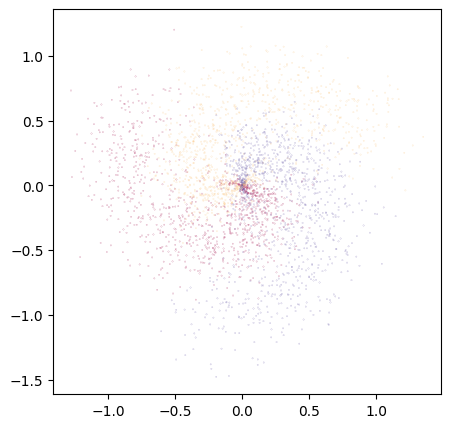

In [ ]:
## Spiral Dataset
X,y=make_spiral_data(1000, 3)
plot_2d_data(X, y)

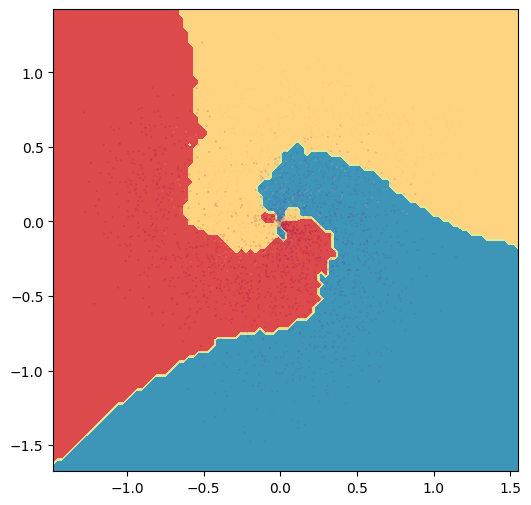

In [ ]:
k = 28
model = KNN(X,y,k)
model.train(X, y)
plot_2d_classifier(X, y, model.predict)

We can check by eye which classifier "seems best", but lets also try to generate data to support that. Split X up into a validation set, and compare accuracy on the validation set over the ranges of hyperparameters you chose above.

{1: 0.755, 2: 0.765, 3: 0.7833333333333333, 4: 0.785, 5: 0.7933333333333333, 6: 0.795, 7: 0.7933333333333333, 8: 0.805, 9: 0.8066666666666666, 10: 0.805, 11: 0.8016666666666666, 12: 0.805, 13: 0.8, 14: 0.7933333333333333, 15: 0.8016666666666666, 16: 0.7933333333333333, 17: 0.7933333333333333, 18: 0.7933333333333333, 19: 0.795, 20: 0.8, 21: 0.7966666666666666, 22: 0.79, 23: 0.7933333333333333, 24: 0.7866666666666666, 25: 0.7916666666666666, 26: 0.7933333333333333, 27: 0.7966666666666666, 28: 0.79, 29: 0.7866666666666666, 30: 0.7816666666666666, 31: 0.7833333333333333, 32: 0.7833333333333333, 33: 0.785, 34: 0.7833333333333333, 35: 0.7816666666666666, 36: 0.7933333333333333, 37: 0.785, 38: 0.7866666666666666, 39: 0.785, 40: 0.785}


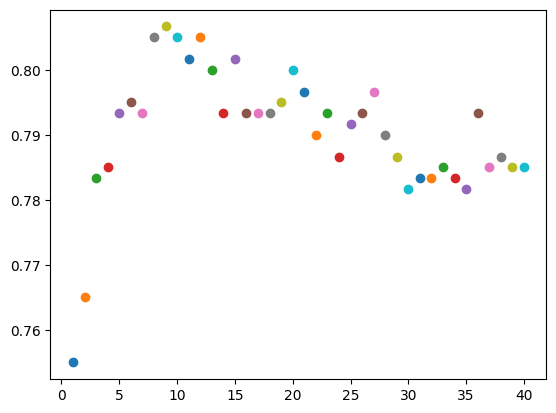

In [ ]:
# make training and validation sets
spiral_indices = np.arange(len(X))
np.random.shuffle(spiral_indices)
spiral_indices_train = spiral_indices[:int(np.floor(0.8*len(X)))]
spiral_indices_val = spiral_indices[int(np.floor(0.8*len(X))):]
X_ttrain = X[spiral_indices_train]  # the actual training set without the validation
y_ttrain = y[spiral_indices_train]
X_val = X[spiral_indices_val]
y_val = y[spiral_indices_val]

# Create knn for each k and calculate accuracy
spiral_dict = {}
for k in range(1, 41):
  spiral_knn = KNN(X_ttrain, y_ttrain, k)
  spiral_knn.train(X_ttrain, y_ttrain)
  acc = 0
  for x in range(len(X_val)):
    if spiral_knn.predict(X_val[x]) == y_val[x]:
      acc += 1
  spiral_dict[k]=acc/X_val.shape[0]
  plt.scatter(k,acc/X_val.shape[0])
print(spiral_dict)  # points are (k, accuracy)


# Create validation set and choose hyperparameters for MNIST and CIFAR-10

We train the KNN on mnist and cifar and optimize the hyperparameter k.

In [ ]:
def train_test_val_split(X,y,train_per,val_per,test_per):
  indices = np.arange(len(X))
  np.random.shuffle(indices)
  split0 = int(np.floor(train_per*len(X)))
  split1 = split0+int(np.floor(test_per*len(X)))
  split2 = split1+int(np.floor((val_per*len(X))))
  train_indices = indices[:split0]
  test_indices = indices[split0:split1]
  val_indices = indices[split1:split2]
  return X[train_indices], y[train_indices], X[test_indices], y[test_indices], X[val_indices], y[val_indices]


In [ ]:
X_train_mnist = X_train_mnist*1.0
X_train_cifar = X_train_cifar*1.0

X_ttrain_mnist, y_ttrain_mnist, X_test_mnist, y_test_mnist, X_val_mnist, y_val_mnist = train_test_val_split(X_train_mnist,y_train_mnist,0.15, 0.005, 0.005)
X_ttrain_cifar, y_ttrain_cifar, X_test_cifar, y_test_cifar, X_val_cifar, y_val_cifar = train_test_val_split(X_train_cifar,y_train_cifar,0.15, 0.005, 0.005)


mnist_dict = {}
for mnist_k in range(1, 6):
  mnist_knn = KNN(X_ttrain_mnist, y_ttrain_mnist, mnist_k)
  mnist_knn.train(X_ttrain_mnist, y_ttrain_mnist)
  acc = 0
  for x in range(len(X_val_mnist)):
    if mnist_knn.predict(X_val_mnist[x])==y_val_mnist[x]:
      acc += 1
  mnist_dict[mnist_k]=acc/X_val_mnist.shape[0]
print(mnist_dict)  # {k:accuracy}

cifar_dict = {}
for cifar_k in range(1, 6):
  cifar_knn = KNN(X_ttrain_cifar, y_ttrain_cifar, cifar_k)
  cifar_knn.train(X_ttrain_cifar, y_ttrain_cifar)
  acc = 0
  for x in range(len(X_val_cifar)):
    if cifar_knn.predict(X_val_cifar[x])==y_val_cifar[x]:
      acc += 1
  cifar_dict[cifar_k]=acc/X_val_cifar.shape[0]
print(cifar_dict)  # {k:accuracy}



{1: 0.96, 2: 0.9433333333333334, 3: 0.9466666666666667, 4: 0.9466666666666667, 5: 0.9533333333333334}
{1: 0.26, 2: 0.224, 3: 0.244, 4: 0.22, 5: 0.252}


# Final test accuracy for MNIST and CIFAR-10

In [ ]:
mnist_acc = 0
mnist_k = 1
mnist_knn = KNN(X_ttrain_mnist, y_ttrain_mnist, mnist_k)
mnist_knn.train(X_ttrain_mnist, y_ttrain_mnist)
for x in range(len(X_test_mnist)):
  if mnist_knn.predict(X_test_mnist[x])==y_test_mnist[x]:
    mnist_acc += 1
print(mnist_acc/len(X_test_mnist))

cifar_acc = 0
cifar_k = 1
cifar_knn = KNN(X_ttrain_cifar, y_ttrain_cifar, cifar_k)
cifar_knn.train(X_ttrain_cifar, y_ttrain_cifar)
for x in range(len(X_test_cifar)):
  if cifar_knn.predict(X_test_cifar[x])==y_test_cifar[x]:
    cifar_acc += 1
print(cifar_acc/len(X_test_cifar))


0.9333333333333333
0.268


# References

## Resources Used

Mention any resources used while working on this assignments (include links, mention people, put in LLM queries)

https://numpy.org/doc/stable/reference/generated/numpy.sum.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html

https://numpy.org/doc/stable/reference/generated/numpy.argpartition.html

https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html

https://numpy.org/doc/stable/reference/generated/numpy.floor.html

Eric

Jasper

https://stackoverflow.com/questions/10062954/valueerror-the-truth-value-of-an-array-with-more-than-one-element-is-ambiguous

https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html

https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

https://numpy.org/doc/stable/reference/generated/numpy.prod.html

https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison

I spent about 2 hours on this assignment.